# Bienvenidos a la primera práctica de Física Computacional 2024-2 
* Alumna Ayudante: Valentina Santelices
    * Correo: vsantelices2021@udec.cl
* Alumno Ayudante: Juan Ortega
    * Correo: juortega2019@udec.cl


# Motivación: *El tirador y el granjero*

* En la hipótesis del tirador, un buen tirador dispara a un blanco, creando un agujero cada diez centímetros. Supongamos que la superficie del objeto está habitada por criaturas bidimensionales inteligentes. Sus científicos, al observar su universo, descubren una gran ley: "Existe un agujero en el universo cada diez centímetros". Han confundido el resultado del capricho del tirador con una ley inalterable del universo.

![sf1](imagenes/bidi.png)

* La hipótesis del granjero tiene un tono más sombrío: todas las mañanas, un granjero alimenta a sus pavos.
![sf2](imagenes/pavo_1.png)


  Un pavo científico, tras observar que este patrón se mantiene durante casi un año, hace el siguiente descubrimiento: "Todas las mañanas a las once llega la comida".

![sf3](imagenes/pavo_2.png)


  Sin embargo, la mañana del Día de Acción de Gracias, en lugar de comida, el granjero llega y mata a todo el rebaño.

![sf4](imagenes/pavo_3.png)


Estas dos hipótesis ilustran cómo la observación limitada puede llevar a la creencia errónea de que una correlación temporal o causal es una ley inmutable del universo.

*Fuente: Three body, cap-2, min:20:00*

# Comencemos por el principio, definamos unos cuantos conceptos sobre errores: 
* Error absoluto = Valor Aproximado - Valor Real
* Error Relativo = $ \frac{\text{Error Absoluto}}{\text{Valor Real}}$

donde debemos tener en cuenta que el error relativo no está definido si el valor real es cero.

# Error de datos y error computacional
Supongamos que debemos trabajar con datos inexactos, digamos $ \hat{x} $, y que sólo podemos calcular una aproximación a la función, digamos $ f(\hat{x}) $.

$ \text{Error Total} = \hat{f}(\hat{x})-f(x) $

Luego, usando el truco matemático estándar de sumar y restar la misma cantidad para que el total no cambie, tenemos: 

$ \text{Error Total} = (\hat{f}(\hat{x})-f(\hat{x})   +   (f(\hat{x})-f(x)) $

$ \text{Error Total} = \text{Error computacional} + \text{Error de datos propagados}  $

# Ejemplo 1: 
Supongamos que no tenemos acceso a una computadora o calculadora (o Chatgpt) y necesitamos una aproximación *" rapida y sucia "* a $\sin (\pi/8)$. Primero, necesitamos un valor de $\pi$ para determinar el valor de entrada. Para ello recordarmos la simple aproximación de $\pi = 3$ conocida por muchos desde nuestros tiempos de antaño. Para calcular el valor de la función, recordamos del cálculo que una buena aproximación para argumentos pequeños es usar el primer término en la expansión en *serie de Taylor*, que para $\sin(x)$ es simplemente $x$. Nuestro resultado final es por lo tanto:

$\sin(\pi/8) \approx \sin(3/8) \approx 3/8 = 0.3750$

Más tarde, habiendo obtenido acceso a una calculadora, determinamos que la respuesta correcta, con cuatro digitos decimales, es: 

$\sin(\pi/8) \approx 0.3827$

Asi que el error total es:

$ f(\hat{x})-f(x) \approx 0.3750-0.3827 = -0.0077 $

Al observar que la respuesta correcta para la entrada perturbada es: 

$f(\hat{x}) = \sin(3/8) \approx 0.3663$

Vemos que el error de datos propagados inducido al usar la entrada inexacta es: 

$ f(\hat{x})-f(x) = \sin(3/8) - \sin(\pi/8) \approx 0.3663-0.3827 = -0.0164 $

El error computacional causado al truncar la serie infinita es: 

$ \hat{f}(\hat{x})-f(\hat{x}) = 3/8-\sin(3/8) \approx 0.3750-0.3663 = 0.0087 $

La suma de estos dos errores representa el error total observado: 

$ \text{Error Total} = 0.0087+(-0.0164)= -0.0077 $

Para este ejemplo en partícular, los dos errores tienen signos opuestos, por lo que se compensan parcialmente entre sí

# Ejemplo 2: Derivemos la expresión de la derivada retrasada utilizando la expansión en serie de Taylor. 
* Derivada retrasada:

$$
f'(x) \approx \frac{f(x) - f(x-h)}{h} + \frac{h}{2!} f''(\alpha)
$$

# Demostración:

Usando la expansión en Taylor para $f(x-h)$:

$$
f(x-h) = f(x) - h f'(x) + \frac{h^2}{2!} f''(x) - \frac{h^3}{3!} f'''(x) + \cdots \quad \text{(iii)}
$$

Restando a (iii) $f(x)$:

$$
f(x) - f(x-h) = h f'(x) - \frac{h^2}{2!} f''(x) + \frac{h^3}{3!} f'''(x) + \cdots
$$

Dividiendo ambos lados por $h$:

$$
\frac{f(x) - f(x-h)}{h} = f'(x) - \frac{h}{2!} f''(x) + \frac{h^2}{3!} f'''(x) + \cdots
$$

Finalmente, obtenemos:

$$
f'(x) = \frac{f(x) - f(x-h)}{h} + \frac{h}{2!} f''(x) - \frac{h^2}{3!} f'''(x) + \cdots
$$

Dado que el error de truncamiento será del orden $O(h)$.

# Calculo de h óptimo:

Tomamos $\hat{a} = a(1 + \epsilon)$, donde $\hat{a}$ es el valor de $a$ en el computador, pero con error de redondeo $\epsilon$, donde $\epsilon$ puede depender de $a$. Para la derivada retrasada, tomamos lo siguiente:

$$
f'(x) = \frac{f(x) - f(x-h)}{h} + \frac{h}{2!}f''(\alpha)
$$

donde, como mencionamos, hemos redondeado

$$
\hat{f}(x-h) = f(x-h)(1 + \epsilon_2) \quad \text{y} \quad \hat{f}(x) = f(x)(1 + \epsilon_1)
$$

Realicemos el análisis:

$$
f'(x) - \frac{\hat{f}(x) - \hat{f}(x-h)}{h} = \frac{h}{2!} f''(\alpha)
$$

Expandiendo y simplificando:

$$
f'(x) - \frac{f(x)(1 + \epsilon_1) - f(x-h)(1 + \epsilon_2)}{h} = \frac{h}{2!} f''(\alpha)
$$

$$
f'(x) - \frac{f(x) - f(x-h)}{h} = \frac{h}{2!} f''(\alpha) + \frac{f(x)\epsilon_1 - f(x-h)\epsilon_2}{h}
$$

Aplicando la desigualdad triangular:

$$
\left|f'(x) - \frac{f(x) - f(x-h)}{h}\right| \leq \frac{h}{2} \left|f''(\alpha)\right| + \frac{|\epsilon_1|}{h} \left|f(x)\right| + \frac{|\epsilon_2|}{h} \left|f(x-h)\right|
$$

Podemos asumir que:

1. Existe un valor $\epsilon^*$ tal que $\epsilon^* \gg  \left|\epsilon_1 \right|$ y $\epsilon^* \gg \left| \epsilon_2\right|$.
2. Si $h \ll 1$, entonces $\alpha \approx x \wedge \left|f(x+h)\right| \approx \left|f(x)\right|$.

Entonces:

$$
\left|f'(x) - \frac{f(x) - f(x-h)}{h}\right| \leq \frac{h}{2} \left|f''(x)\right| + \frac{2 \epsilon^*}{h^2}\left|f(x)\right|
$$

De aquí, el error absoluto (analítico) es:

$$
E_{\text{abs}} \leq \frac{2\epsilon^*}{h} \left|f(x)\right| + \frac{h}{2} \left|f''(x)\right|
$$

El error absoluto derivado es:

$$
E'_{\text{abs}} \leq -\frac{2\epsilon^*}{h^2} \left|f(x)\right| + \frac{1}{2} \left|f''(x)\right|
$$

Una buena estimación del error es asumir que $\epsilon^* \approx 2^{-\rho}$, con $2^{-\rho}$ precisión de máquina ($\rho = 23$ precisión simple y $\rho = 52$ precisión doble).

Por otro lado, el valor óptimo de $h$ se obtiene a partir de $E'_{\text{abs}} = 0$. Calculemos:

$$
-\frac{2\epsilon^*}{h^2} \left|f(x)\right| + \frac{1}{2} \left|f''(x)\right| = 0
$$

$$
\frac{4\epsilon^* \left|f(x)\right|}{\left|f''(x)\right|} = h^2
$$

$$
h = \sqrt{\frac{4\epsilon^* \left|f(x)\right|}{\left|f''(x)\right|}}
$$
# Segunda derivada del error absoluto:
Para determinar si este valor de $ h $ es un mínimo o un máximo, calculamos la segunda derivada del error absoluto $ E_{\text{abs}} $ con respecto a $ h $:

$$
E''_{\text{abs}} = \frac{d}{dh} \left( -\frac{2\epsilon^*}{h^2} \left|f(x)\right| + \frac{1}{2} \left|f''(x)\right| \right)
$$

Obteniendo así:

$$
E''_{\text{abs}} = \frac{4\epsilon^* \left|f(x)\right|}{h^3}
$$

Observa que $ E''_{\text{abs}} $ es siempre positivo porque:
- $ \epsilon^* > 0 $ (el error de redondeo es positivo).
- $ \left|f(x)\right| > 0 $ (el valor absoluto de la función es positivo).
- $ h^3 > 0 $ para $ h > 0 $.

# Interpretación del resultado:
- Si $ E''_{\text{abs}} > 0 $, significa que la función $ E_{\text{abs}} $ tiene una concavidad hacia arriba en el punto $ h $. Esto implica que el punto es un mínimo local. Es decir, el valor de $ h $ que hemos encontrado efectivamente minimiza el error absoluto.
- Si $ E''_{\text{abs}} < 0 $, la función tendría una concavidad hacia abajo, lo que indicaría un máximo local. Pero en este caso, como $ E''_{\text{abs}} > 0 $, estamos confirmando que el punto es un mínimo.



# Ejercicio 1: Comparación de Métodos para Diferentes Funciones

**Objetivo:** Comparar la precisión de los métodos de derivación numérica para diferentes tipos de funciones.

1. **Instrucciones:**
   - Implementa la siguiente funcion: $f(x) = \sin(x)$, $f(x) = e^x$, $f(x) = \ln(x)$ (en $x > 0$), y $f(x) = x^2$.
   - Calcula las derivadas numéricas usando los tres métodos para cada función.
   - Grafica todas las derivadas y compara con las derivadas exactas de cada función.

2. **Preguntas:**
   - ¿Qué función resulta más difícil de derivar numéricamente?
   - ¿Qué observaciones puedes hacer acerca de la precisión de cada método en función del tipo de función?

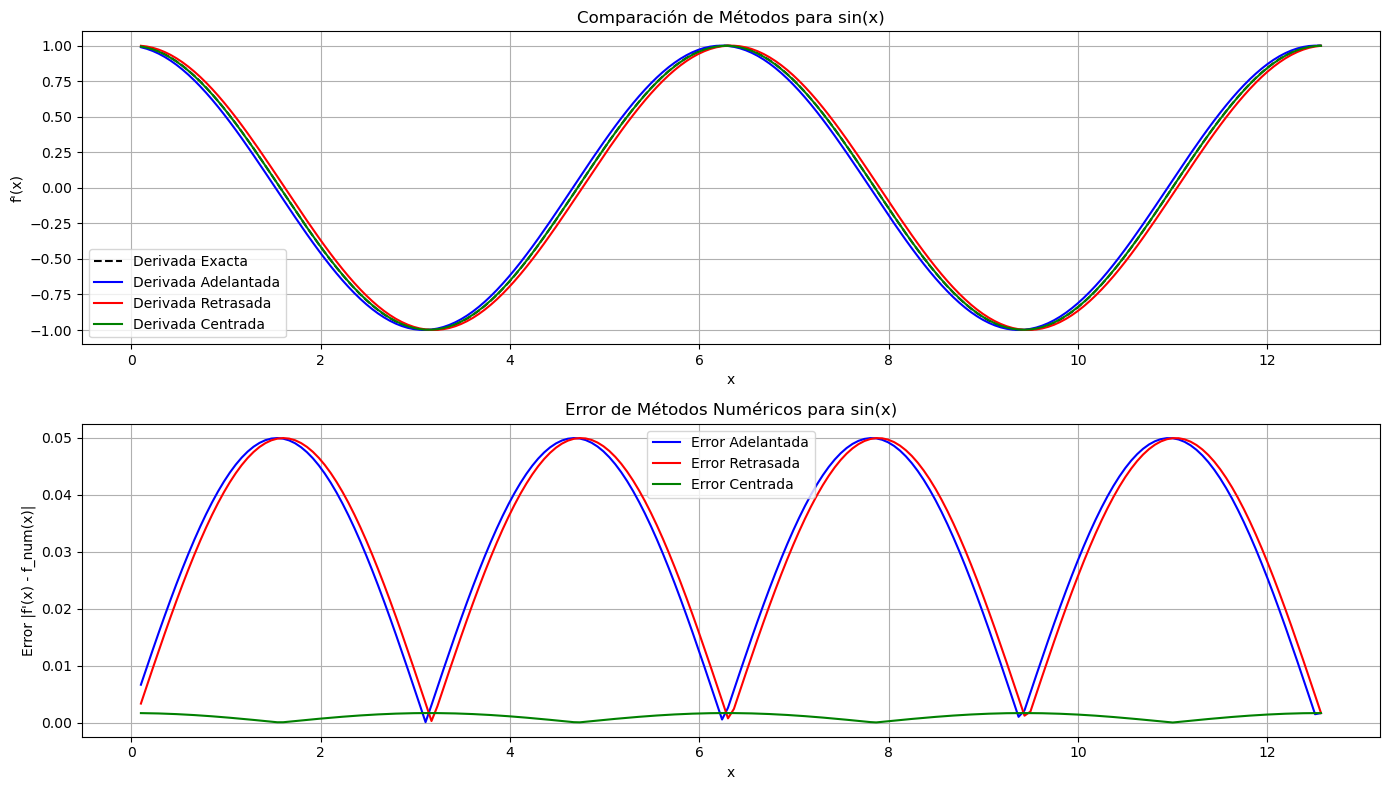

In [1]:
# Código de ayuda para implementar el ejercicio anterior, donde la función ejemplo sera: sin(x).

import numpy as np
import matplotlib.pyplot as plt

# Definimos la función y su derivada exacta
f_sin = lambda x: np.sin(x)
f_prime_sin = lambda x: np.cos(x)

# Derivada adelantada
forward_diff = lambda f, x, h: (f(x + h) - f(x)) / h

# Derivada retrasada
backward_diff = lambda f, x, h: (f(x) - f(x - h)) / h

# Derivada centrada
centered_diff = lambda f, x, h: (f(x + h) - f(x - h)) / (2 * h)

# Valores para la comparación
x = np.linspace(0.1, 4 * np.pi, 200)  # Se evita x=0 para evitar problemas con ln(x)
h = 0.1  # Tamaño de paso

# Calculamos las derivadas numéricas
f_prime_forward = forward_diff(f_sin, x, h)
f_prime_backward = backward_diff(f_sin, x, h)
f_prime_centered = centered_diff(f_sin, x, h)
f_prime_true = f_prime_sin(x)

# Calculamos el error de cada método
error_forward = np.abs(f_prime_forward - f_prime_true)
error_backward = np.abs(f_prime_backward - f_prime_true)
error_centered = np.abs(f_prime_centered - f_prime_true)

plt.figure(figsize=(14, 8))

# Graficar las derivadas
plt.subplot(2, 1, 1)
plt.plot(x, f_prime_true, label='Derivada Exacta', color='black', linestyle='--')
plt.plot(x, f_prime_forward, label='Derivada Adelantada', color='blue')
plt.plot(x, f_prime_backward, label='Derivada Retrasada', color='red')
plt.plot(x, f_prime_centered, label='Derivada Centrada', color='green')
plt.legend()
plt.title("Comparación de Métodos para sin(x)")
plt.xlabel('x')
plt.ylabel("f'(x)")
plt.grid(True)

# Graficar el error
plt.subplot(2, 1, 2)
plt.plot(x, error_forward, label='Error Adelantada', color='blue')
plt.plot(x, error_backward, label='Error Retrasada', color='red')
plt.plot(x, error_centered, label='Error Centrada', color='green')
plt.legend()
plt.title("Error de Métodos Numéricos para sin(x)")
plt.xlabel('x')
plt.ylabel("Error |f'(x) - f_num(x)|")
plt.grid(True)

plt.tight_layout()
plt.show()
